# Predicting Car Prices

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create list of all column names to be used as headers
cols = ['symboling','normalized_losses','make','fuel_type','aspiration','num_doors',
        'body_style','drive_wheels','engine_location','wheel_base','length',
        'width','height','curb_weight','engine_type','num_cylinders',
        'engine_size','fuel_system','bore','stroke','compression_ratio',
        'horsepower','peak_rpm','city_mpg','highway_mpg','price']

# Read in the data file with headers needed.
cars = pd.read_csv('imports-85.data', names=cols)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


The header column of our dataset was not included in the file. I added a list of column names to be used as the header for our dataset upon reading the file in to a dataframe.

Reviewing our data, the following columns appear to be numeric (with some change required):

1. normalized_losses
2. wheel_base
3. length
4. width
5. height
6. curb_weight
7. bore
8. stroke
9. compression_ratio
10. horsepower
11. peak_rpm
12. city_mpg
13. highway_mpg

Our target is the price column.

With this dataset, there are a few noticeable things to be fixed. The normalized_losses column includes values with a "?". We need to remove these in order to make the column truly numeric. We'll replace "?" in all columns with NaN. We'll also go ahead and rescale these values to a range from 0-1.

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

In [4]:
# Make list of only the numeric columns
num_cols = ['normalized_losses','wheel_base','length','width','height',
            'curb_weight','bore','stroke','compression_ratio','horsepower',
            'peak_rpm','city_mpg','highway_mpg','price']
numeric_cars = cars[num_cols]

In [5]:
# Replace any "?" with NaN to fill in gaps and convert to a numeric value
numeric_cars = numeric_cars.replace('?', np.nan)

In [6]:
# Convert all columns to a numeric equivalent
numeric_cars = numeric_cars.astype('float')

In [7]:
numeric_cars.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [8]:
# Remove any rows without a price as they won't provide us any prediction
numeric_cars.dropna(subset=['price'], inplace=True)

In [9]:
numeric_cars.isnull().sum()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [10]:
# Let's fill all other zeros with the mean of the corresponding columns to be 
# able to use the info without impacting our results
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [11]:
numeric_cars.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [12]:
# Since price is out target, we'll separate it out
price = numeric_cars['price']
numeric_cars.drop(columns=['price'], inplace=True)

In [13]:
# Let's normalize all of the feature columns to a range from 0 to 1
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())

In [14]:
# Let's add back price after normalization
numeric_cars['price'] = price

In [15]:
numeric_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Predicting Prices Using Univariate K-Nearest Neighbors

In [16]:
def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    #Randomly shuffle order of rows in dataframe
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    # Divide dataset in half for splitting between train/test sets
    dividing_row = int(len(df) / 2)
    
    # Split dataset
    train_df = df.iloc[0:dividing_row]
    test_df = df.iloc[dividing_row:]
    
    knn.fit(train_df[[train_col]], train_df[target_col])
    prediction = knn.predict(test_df[[train_col]])
    mse = mean_squared_error(test_df[target_col], prediction)
    rmse = np.sqrt(mse)
    return rmse

train_cols = numeric_cars.columns.drop('price')
knn_default_k = {}
for col in train_cols:
    knn_default_k[col] = knn_train_test(col, 'price', numeric_cars)
    
for key in knn_default_k:
    print('For train_col={}, RMSE was {}'.format(key, knn_default_k[key]))

For train_col=bore, RMSE was 6780.627784685976
For train_col=normalized_losses, RMSE was 7330.197653434445
For train_col=curb_weight, RMSE was 4401.118254793124
For train_col=height, RMSE was 8144.441042663747
For train_col=peak_rpm, RMSE was 7697.4596964334805
For train_col=width, RMSE was 4704.482589704386
For train_col=city_mpg, RMSE was 4766.422505090134
For train_col=length, RMSE was 5427.2009608367125
For train_col=wheel_base, RMSE was 5461.553997873057
For train_col=stroke, RMSE was 8006.529544647101
For train_col=compression_ratio, RMSE was 6610.812153159129
For train_col=highway_mpg, RMSE was 4630.026798588056
For train_col=horsepower, RMSE was 4037.0377131537603


The column that performed best with default k was horsepower.

### Let's test results with varying values for k

In [17]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
    
    #Randomly shuffle order of rows in dataframe
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    # Divide dataset in half for splitting between train/test sets
    dividing_row = int(len(df) / 2)
    
    # Split dataset
    train_df = df.iloc[0:dividing_row]
    test_df = df.iloc[dividing_row:]
    
    # Run K Nearest Neighbors modeling with different k values
    k_vals = [1,3,5,7]
    k_rmse = {}
    
    for k in k_vals:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])
        prediction = knn.predict(test_df[[train_col]])
        mse = mean_squared_error(test_df[target_col], prediction)
        rmse = np.sqrt(mse)
        k_rmse[k] = rmse
    return k_rmse

knn_diff_k = {}

for col in train_cols:
    knn_diff_k[col] = knn_train_test(col, 'price', numeric_cars)
    
for key in knn_diff_k:
    print('For train_col={}, RMSE for different k were {}'.format(key, knn_diff_k[key]))

For train_col=bore, RMSE for different k were {1: 8602.58848450066, 3: 6984.239489480916, 5: 6780.627784685976, 7: 6878.097965921532}
For train_col=normalized_losses, RMSE for different k were {1: 7846.750605148984, 3: 7500.5698123109905, 5: 7330.197653434445, 7: 7756.421586234123}
For train_col=curb_weight, RMSE for different k were {1: 5264.290230758878, 3: 5022.318011757233, 5: 4401.118254793124, 7: 4330.608104418053}
For train_col=height, RMSE for different k were {1: 8904.04645636071, 3: 8277.609643045525, 5: 8144.441042663747, 7: 7679.598124393773}
For train_col=peak_rpm, RMSE for different k were {1: 9511.480067750124, 3: 8537.550899973421, 5: 7697.4596964334805, 7: 7510.294160083481}
For train_col=width, RMSE for different k were {1: 4559.257297950061, 3: 4606.413692169901, 5: 4704.482589704386, 7: 4571.485046194653}
For train_col=city_mpg, RMSE for different k were {1: 5901.143574354764, 3: 4646.746408727155, 5: 4766.422505090134, 7: 5232.523034167316}
For train_col=length, RM

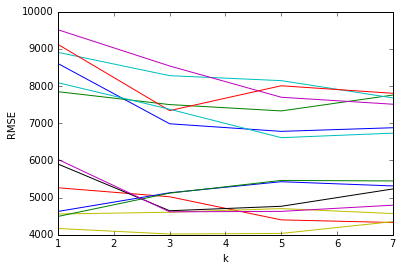

In [18]:
for k,v, in knn_diff_k.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k')
    plt.ylabel('RMSE')

### Let's model the results again, but multivariate using different columns

In [20]:
# Let's get the average rmse across k values for each column to use in determining
# best features for multivariate analysis
feat_avg_rmse = {}
for k, v in knn_diff_k.items():
    avg_rmse = np.mean(list(v.values()))
    feat_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feat_avg_rmse)
series_avg_rmse.sort_values()

horsepower           4145.438421
width                4610.409657
curb_weight          4754.583650
highway_mpg          5017.247056
length               5124.730001
wheel_base           5130.889156
city_mpg             5136.708881
compression_ratio    7201.470617
bore                 7311.388431
normalized_losses    7608.484914
stroke               8066.411992
height               8251.423817
peak_rpm             8314.196206
dtype: float64

In [21]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    #Randomly shuffle order of rows in dataframe
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    # Divide dataset in half for splitting between train/test sets
    dividing_row = int(len(df) / 2)
    
    # Split dataset
    train_df = df.iloc[0:dividing_row]
    test_df = df.iloc[dividing_row:]
    
    # Run K Nearest Neighbors modeling with different k values
    k_vals = [5]
    k_rmse = {}
    
    for k in k_vals:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        prediction = knn.predict(test_df[train_cols])
        mse = mean_squared_error(test_df[target_col], prediction)
        rmse = np.sqrt(mse)
        k_rmse[k] = rmse
    return k_rmse

knn_best_features = {}

two_best_features = ['horsepower','width']
rmse_result = knn_train_test(two_best_features, 'price', numeric_cars)
knn_best_features['two_best_features'] = rmse_result

three_best_features = ['horsepower','width','curb_weight']
rmse_result = knn_train_test(three_best_features, 'price', numeric_cars)
knn_best_features['three_best_features'] = rmse_result

four_best_features = ['horsepower','width','curb_weight','highway_mpg']
rmse_result = knn_train_test(four_best_features, 'price', numeric_cars)
knn_best_features['four_best_features'] = rmse_result

five_best_features = ['horsepower','width','curb_weight','highway_mpg','length']
rmse_result = knn_train_test(five_best_features, 'price', numeric_cars)
knn_best_features['five_best_features'] = rmse_result

knn_best_features

{'five_best_features': {5: 3665.546673045813},
 'four_best_features': {5: 3358.6915801682458},
 'three_best_features': {5: 3305.9401397969677},
 'two_best_features': {5: 3589.3132622073304}}

Use of 3, 4 and 2 features provided the top 3 models with lowest RMSE. We'll use those to train again with varying k ad see what results we get.

In [22]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    #Randomly shuffle order of rows in dataframe
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    # Divide dataset in half for splitting between train/test sets
    dividing_row = int(len(df) / 2)
    
    # Split dataset
    train_df = df.iloc[0:dividing_row]
    test_df = df.iloc[dividing_row:]
    
    # Run K Nearest Neighbors modeling with different k values
    k_vals = [i for i in range(1,25)]
    k_rmse = {}
    
    for k in k_vals:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        prediction = knn.predict(test_df[train_cols])
        mse = mean_squared_error(test_df[target_col], prediction)
        rmse = np.sqrt(mse)
        k_rmse[k] = rmse
    return k_rmse

knn_results = {}

three_best_features = ['horsepower','width','curb_weight']
rmse_result = knn_train_test(three_best_features, 'price', numeric_cars)
knn_results['three_best_features'] = rmse_result

four_best_features = ['horsepower','width','curb_weight','highway_mpg']
rmse_result = knn_train_test(four_best_features, 'price', numeric_cars)
knn_results['four_best_features'] = rmse_result

two_best_features = ['horsepower','width']
rmse_result = knn_train_test(two_best_features, 'price', numeric_cars)
knn_results['two_best_features'] = rmse_result

knn_results

{'four_best_features': {1: 2600.746383728188,
  2: 2725.4325072335123,
  3: 3108.8580314362966,
  4: 3217.3135209486827,
  5: 3358.6915801682458,
  6: 3633.1687033129465,
  7: 3896.127441396644,
  8: 4002.8383900652543,
  9: 4055.5309369929582,
  10: 4128.67807741542,
  11: 4249.827289347268,
  12: 4344.035898237492,
  13: 4402.995293166156,
  14: 4424.314365328619,
  15: 4442.943179452285,
  16: 4528.57927503009,
  17: 4572.28806185627,
  18: 4604.034045947238,
  19: 4660.524954508328,
  20: 4735.352015758023,
  21: 4742.329532242572,
  22: 4763.606459864159,
  23: 4807.076030845482,
  24: 4848.127192424658},
 'three_best_features': {1: 3013.0109985241875,
  2: 2813.285969825997,
  3: 3171.585284478674,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.506848900376,
  7: 3774.3772094554106,
  8: 3978.969124021116,
  9: 3992.923680588881,
  10: 4076.2381473803043,
  11: 4156.388331131807,
  12: 4201.10713385948,
  13: 4303.62676861325,
  14: 4359.693296989702,
  15: 4371.7711

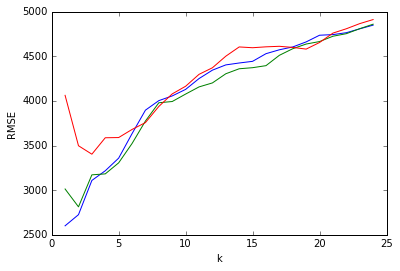

In [24]:
for k, v in knn_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k')
    plt.ylabel('RMSE')

K values from 1 to 3 appear optimal for each model. The optimal k values are not that different for each, off by 1-2 each. The models seem to be different due to less stability at lower k values.